In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.externals import joblib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

In [61]:
dataset_train = pd.read_csv('train.csv')
print(dataset_train)

          Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0     05-11-04   88.00   88.00   70.00   75.55   75.55             232535736   
1     08-11-04   76.80   78.60   75.00   75.15   75.20              68865277   
2     09-11-04   75.10   76.10   74.55   75.25   75.30              37460886   
3     10-11-04   75.50   75.95   75.00   75.05   75.05              17413433   
4     11-11-04   75.35   75.40   74.30   74.60   74.45              15961426   
...        ...     ...     ...     ...     ...     ...                   ...   
2029  02-01-13  156.30  158.00  156.25  157.50  157.50               1285883   
2030  03-01-13  157.75  159.40  156.80  157.60  157.55               1998735   
2031  04-01-13  157.95  159.40  157.60  158.70  158.90               1432012   
2032  07-01-13  159.00  159.25  156.75  157.20  157.60               1315208   
2033  08-01-13  157.50  158.00  156.50  157.80  157.45               2827055   

      Turnover (Lacs)  
0           170

In [62]:
training_set = dataset_train.iloc[:, 5:6].values
print(training_set)

[[ 75.55]
 [ 75.2 ]
 [ 75.3 ]
 ...
 [158.9 ]
 [157.6 ]
 [157.45]]


In [63]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [66]:
X_train = []
y_train = []
for i in range(60, 2034):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [42]:
regressor = Sequential()

regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
1940/1940 [==============================] - 6s 3ms/step - loss: 0.0122
Epoch 2/80
1940/1940 [==============================] - 5s 3ms/step - loss: 0.0029
Epoch 3/80
1940/1940 [==============================] - 5s 3ms/step - loss: 0.0029
Epoch 4/80
1940/1940 [==============================] - 6s 3ms/step - loss: 0.0028
Epoch 5/80
1940/1940 [==============================] - 5s 3ms/step - loss: 0.0027
Epoch 6/80
1940/1940 [==============================] - 6s 3ms/step - loss: 0.0024
Epoch 7/80
1940/1940 [==============================] - 5s 3ms/step - loss: 0.0024
Epoch 8/80
1940/1940 [==============================] - 6s 3ms/step - loss: 0.0024
Epoch 9/80
1940/1940 [==============================] - 7s 3ms/step - loss: 0.0022
Epoch 10/80
1940/1940 [==============================] - 6s 3ms/step - loss: 0.0021
Epoch 11/80
1940/1940 [==============================] - 6s 3ms/step - loss: 0.0021
Epoch 12/80
1940/1940 [==============================] - 6s 3ms/step - loss: 0.0020
E

In [86]:
dataset_test = pd.read_csv('test2.csv')
real_stock_price = dataset_test.iloc[:, 5:6].values

In [91]:
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis =0)
#print(dataset_total)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
#print(inputs)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 760) :
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

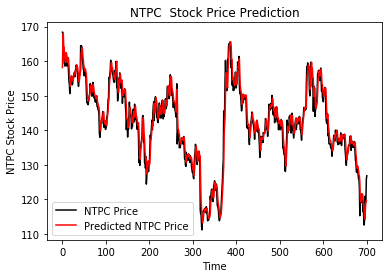

In [92]:
plt.plot(real_stock_price, color = 'black', label = 'NTPC Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted NTPC Price')
plt.title('NTPC  Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NTPC Stock Price')
plt.legend()
plt.show()

In [95]:
dataset_test1 = pd.read_csv('test1.csv')
real_stock_price1 = dataset_test1.iloc[:, 5:6].values

In [96]:
inputt=[]
inputt=dataset_test1['Close'].values
inputt = inputt.reshape(-1,1)

In [97]:
inputt.shape

(64, 1)

In [98]:
inputt = sc.transform(inputt)
X_test1 = []
for i in range(60, 61) :
    X_test1.append(inputt[i-60:i, 0])
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1))
predicted_stock_price1 = regressor.predict(X_test1)
predicted_stock_price1 = sc.inverse_transform(predicted_stock_price1)

In [99]:
print(predicted_stock_price1)

[[147.016]]
